In [1]:
import sys 
import pandas as pd
import numpy as np
import ezdxf 

In [2]:
def get_dxf_data(dxf_file):
    dxf = ezdxf.readfile(dxf_file)
    msp = dxf.modelspace()
    dxf_data = []
    for e in msp:
        if e.dxftype() == 'LINE':
            dxf_data.append([np.array(e.dxf.start)[:-1], np.array(e.dxf.end)[:-1]])
    return np.array(dxf_data)

In [3]:
Data = get_dxf_data('Pol.dxf')

In [4]:
display(Data)

array([[[ 7.00000000e+00, -5.30000000e-15],
        [ 1.05000000e+01,  6.06217783e+00]],

       [[-3.50000000e+00, -6.06217783e+00],
        [-4.00000000e-15, -1.21243557e+01]],

       [[ 3.50000000e+00, -6.06217783e+00],
        [ 7.00000000e+00, -1.21243557e+01]],

       [[ 6.70000000e-15,  1.21243557e+01],
        [ 3.50000000e+00,  6.06217783e+00]],

       [[ 1.05000000e+01,  6.06217783e+00],
        [ 7.00000000e+00,  1.21243557e+01]],

       [[ 1.05000000e+01, -6.06217783e+00],
        [ 7.00000000e+00, -5.30000000e-15]],

       [[ 7.00000000e+00, -1.21243557e+01],
        [ 1.05000000e+01, -6.06217783e+00]],

       [[-3.50000000e+00,  6.06217783e+00],
        [ 0.00000000e+00, -1.80000000e-15]],

       [[ 0.00000000e+00, -1.80000000e-15],
        [ 7.00000000e+00, -5.30000000e-15]],

       [[ 0.00000000e+00, -1.80000000e-15],
        [-3.50000000e+00, -6.06217783e+00]],

       [[ 6.70000000e-15,  1.21243557e+01],
        [-3.50000000e+00,  6.06217783e+00]],

       [[ 

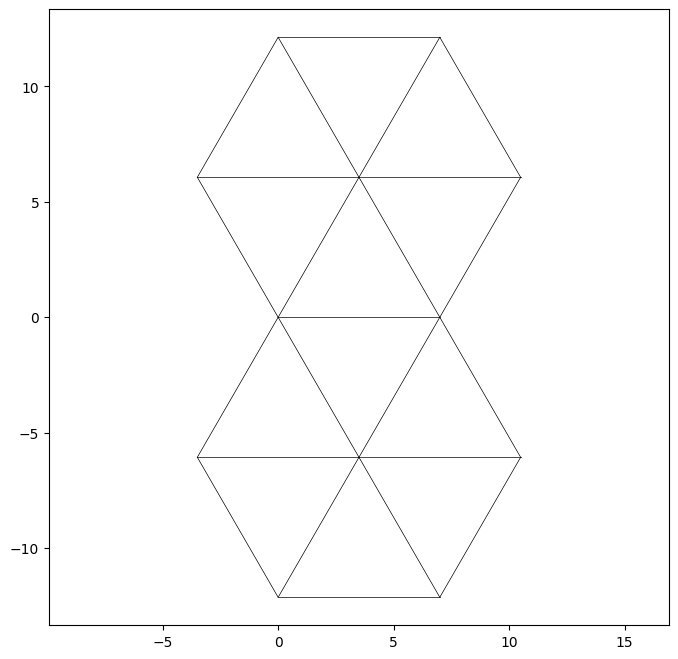

In [5]:
# Plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.axis('equal')
for i in range(len(Data)):
    plt.plot(Data[i,:,0], Data[i,:,1], 'k', linewidth=0.5)
plt.show()

In [6]:
#
nodes = np.unique(np.round(Data.reshape(-1,2), 6), axis=0)
# Edges
edges = np.zeros((len(Data), 2), dtype=int)
for i in range(len(Data)):
    edges[i,0] = np.where(np.all(nodes == np.round(Data[i,0,:], 6), axis=1))[0][0]
    edges[i,1] = np.where(np.all(nodes == np.round(Data[i,1,:], 6), axis=1))[0][0]
#
print('Number of nodes: ', len(nodes))
print('Number of edges: ', len(edges))

Number of nodes:  12
Number of edges:  23


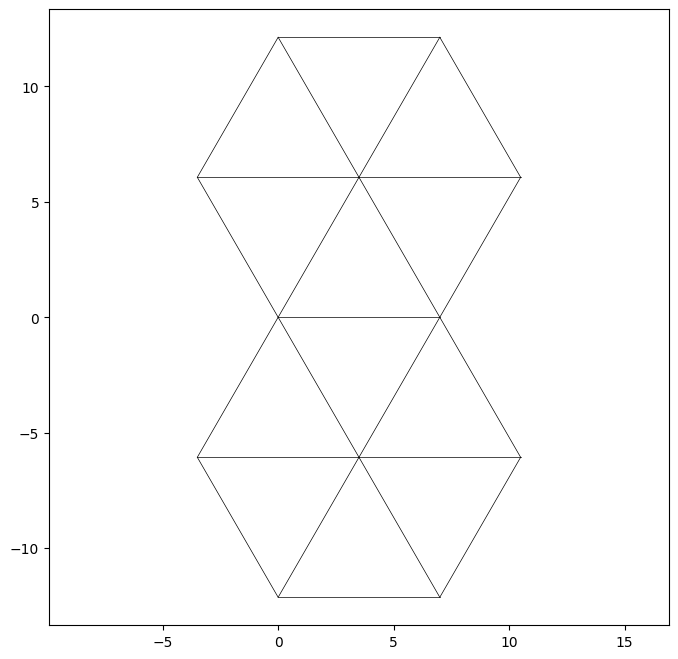

In [7]:
# Plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.axis('equal')
for i in range(len(edges)):
    plt.plot(nodes[edges[i,:],0], nodes[edges[i,:],1], 'k', linewidth=0.5)
plt.show()

In [8]:
# Save the data .npz
np.savez('Pol.npz', nodes=nodes, edges=edges)